#**Customer Segmentation Using K Means Clustering**

This project uses K-Means Clustering to segment customers of a mall based on their age, annual income, and spending behavior. The goal is to group customers into distinct clusters, helping the mall better understand their target audience and personalize marketing strategies.

We use a dataset of 200 customers with the following features:

* CustomerID: Unique identifier for each customer

* Gender: Male or Female

* Age: Customer’s age

* Annual Income (k$): Annual income in thousand dollars

* Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

The clusters help the mall tailor marketing strategies by identifying high-spending or young customers who respond well to promotions. This enables better product placement, personalized offers, and improved customer retention.

In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df= pd.read_csv(r"/content/drive/MyDrive/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


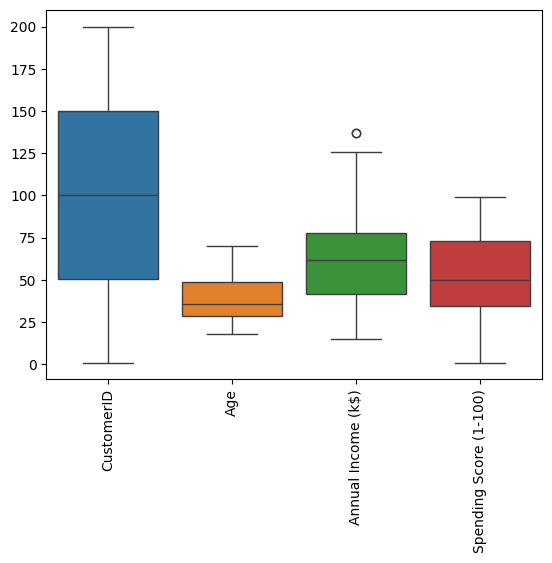

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [9]:
df.rename(columns={'Annual Income (k$)': "Income","Spending Score (1-100)": 'SpendingScore'},inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   Income         200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


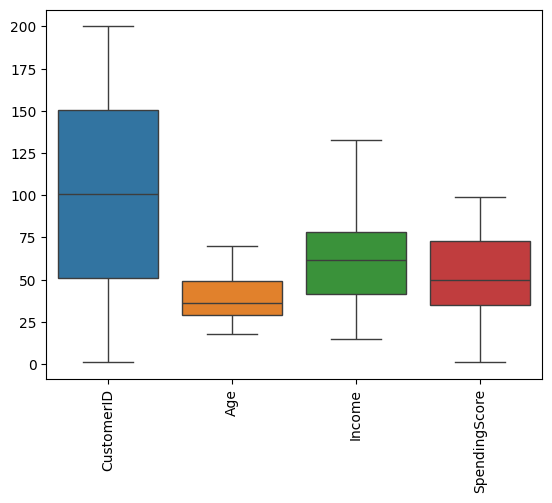

In [11]:
# Handling outlier in Income
Q1= df["Income"].quantile(0.25)
Q3= df["Income"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df["Income"]= df["Income"].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

In [12]:
df.skew(numeric_only=True)

,0
CustomerID,0.000000
Age,0.485569
Income,0.291249
SpendingScore,-0.047220


The data has 200 rows and 5 columns. No missing values and no duplicates. There were very few outiers which were handled. There is no skewness in the data. In short , data is small and clean.

## **Data Analysis**

### Gender of Customers

In [13]:
df["Gender"].value_counts()

,count
Gender,
Female,112
Male,88


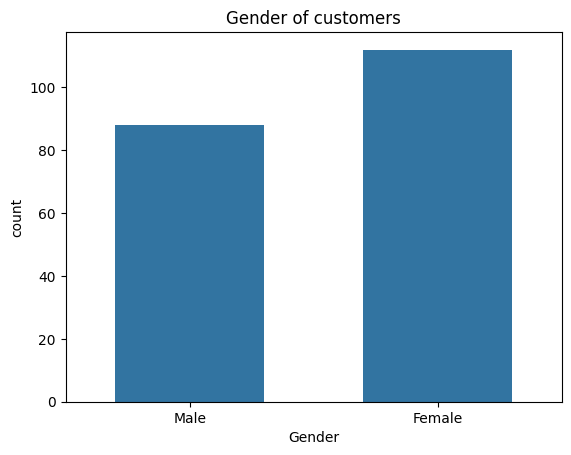

In [14]:
sns.countplot(x=df["Gender"],width=0.6)
plt.title("Gender of customers")
plt.show()

* Female customers are more compared to that of males.

* Female constitutes more than 110 and male customers are about 90 in count.

### Age of Customers

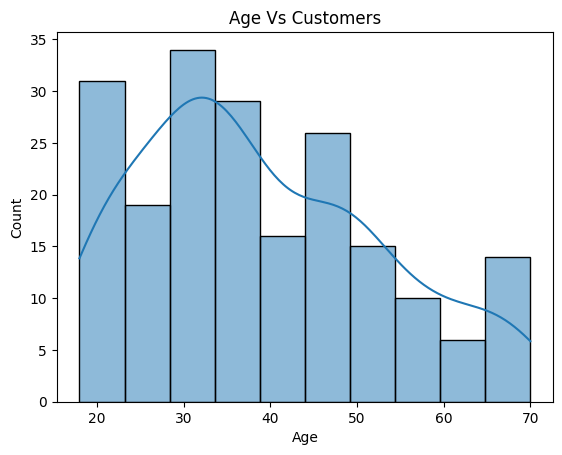

In [15]:
sns.histplot(df["Age"],kde=True,bins=10)
plt.title("Age Vs Customers")
plt.show()

### **Insights**
* Highest number of customers are in 30 to 35 range, lowest is in 60 to 65 range.
* Most of the customers are in the 20-50 age range where as customers greater than 50 are less.
* All range of customers are analysed in the data from youth to old.




### Distribution of Spending Score

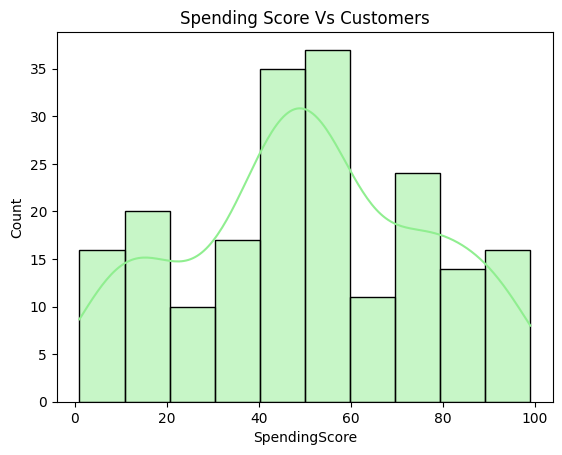

In [16]:
sns.histplot(df["SpendingScore"],kde=True,bins=10,color='lightgreen')
plt.title("Spending Score Vs Customers")
plt.show()

**Insights**
* Highest spending scores are 40 to 60 within the customers.
* Least spending score among customers is 20 t0 30.
* There are more than 50 customers who have spending score greater than 80.
* There are least spending customers and most spending customers.

### Age and Gender Vs Spending Score

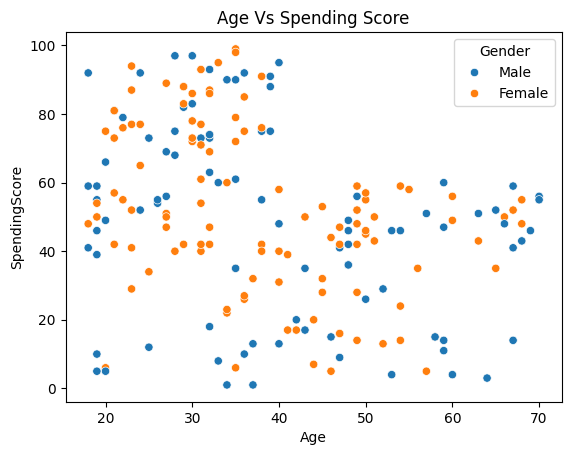

In [17]:
sns.scatterplot(x=df["Age"],y=df["SpendingScore"],hue=df["Gender"])
plt.title("Age Vs Spending Score")
plt.show()


**Insights**
* Customers aging from 20 to 40 spend money the most. Some of them reaches to 100.
* Customers with age greater than 40 spend money consciously. Their highest spending score is 60 compared to that of youth.
* It is clear age plays a crucial role in spending money.
* Gender does not matter. All men and women spend the same , despite their age.

### Income and Spending Score

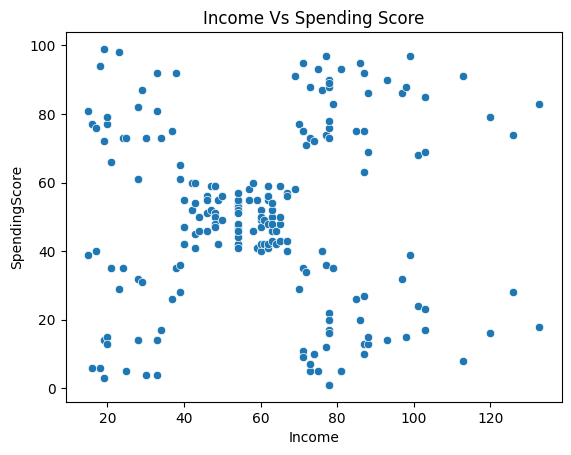

In [18]:
sns.scatterplot(x=df["Income"],y=df["SpendingScore"])
plt.title("Income Vs Spending Score")
plt.show()

**Insights**
* Some people tend to spend more money even though their annual income is less.And some people with more annual income tend to spend less.
* Customers with 20k to 40k and 60k to 80k annual income spend according to their wish. Some spend less while other spend to maximum.
* Customers with 40k to 60k spend efficiently, they spend according to their income.

## **Model** **Building**

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     200 non-null    int64  
 1   Gender         200 non-null    object 
 2   Age            200 non-null    int64  
 3   Income         200 non-null    float64
 4   SpendingScore  200 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 7.9+ KB


In [20]:
# Dropped customer id column
df.drop("CustomerID",axis=1,inplace=True)

In [21]:
# Encoded Gender using order mapping

df["Gender"]= df["Gender"].map({"Male":1,"Female":0})

In [22]:
# Scaling using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X= sc.fit_transform(df)

In [23]:
df

,Gender,Age,Income,SpendingScore
0,1,19,15.00,39
1,1,21,15.00,81
2,0,20,16.00,6
3,0,23,16.00,77
4,0,31,17.00,40
...,...,...,...,...
195,0,35,120.00,79
196,0,45,126.00,28
197,1,32,126.00,74
198,1,32,132.75,18


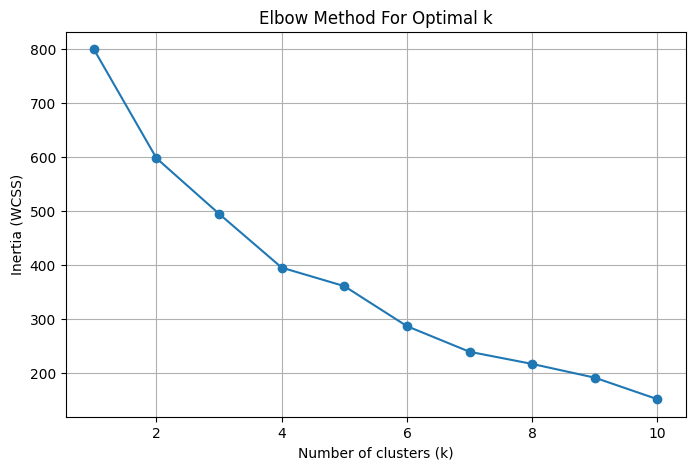

In [24]:
# Finding optimal number of k using elbow method.

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()



From the graph, elbow shape is formed when k = 3.

In [25]:
# Fitting K Means to cluster data.
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

df['Cluster'] = kmeans.labels_
df

,Gender,Age,Income,SpendingScore,Cluster
0,1,19,15.00,39,2
1,1,21,15.00,81,2
2,0,20,16.00,6,0
3,0,23,16.00,77,2
4,0,31,17.00,40,0
...,...,...,...,...,...
195,0,35,120.00,79,2
196,0,45,126.00,28,1
197,1,32,126.00,74,1
198,1,32,132.75,18,1


### Scatter plot : Clusters based on age and spending score

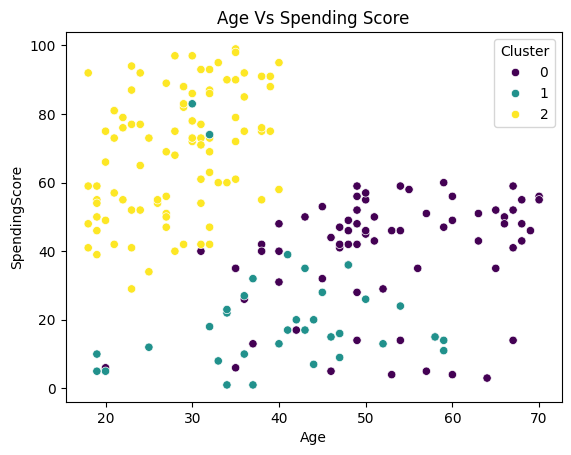

In [26]:
sns.scatterplot(x=df["Age"],y=df["SpendingScore"],hue=df["Cluster"],palette="viridis")
plt.title("Age Vs Spending Score")
plt.show()

### Scatter plot: Clustered based on income and spending score.

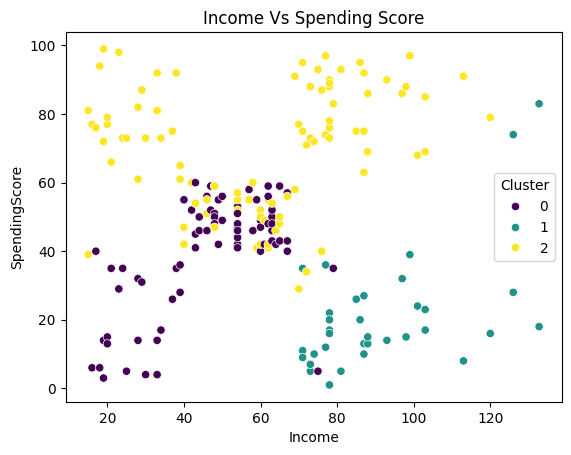

In [29]:
sns.scatterplot(x=df["Income"],y=df["SpendingScore"],hue=df["Cluster"],palette="viridis")
plt.title("Income Vs Spending Score")
plt.show()

In [28]:
cluster_profile = df.groupby('Cluster')[['Age', 'Income', 'SpendingScore']].mean()
print(cluster_profile)


               Age     Income  SpendingScore
Cluster                                     
0        52.169014  46.676056      39.295775
1        40.228571  91.100000      20.628571
2        28.276596  59.585106      69.446809


## **Customer Segments – Key Insights**

###**Cluster 0: Older, Moderate Spenders**

* Average Age: ~52 years — the oldest group.

* Income: Lowest among all clusters (~47).

* Spending Score: Mid-range (~39).

Even though they don’t earn much, they spend at a steady level. They likely focus on essentials and quality. Products that offer comfort or value would suit them best.

### **Cluster 1: High-Income, Low Spenders**

* Average Age: ~40 years — middle-aged group.

* Income: Highest (~91).

* Spending Score: Lowest (~21).

This group has the most money but spends the least. They might prefer to save or invest rather than shop often. Marketing should focus on smart, long-term benefits rather than trends.


### **Cluster 2: Young, High Spenders**

* Average Age: ~28 years — youngest group.

* Income: Moderate (~60).

* Spending Score: Highest (~69).

These are young, active shoppers who enjoy spending, even without high income. They’re more likely to buy trendy, fun products. Online ads and social media marketing can be very effective for this group.
